['a', 'ako', 'ali', 'bi', 'bih', 'bila', 'bili', 'bilo', 'bio', 'bismo', 'biste', 'biti', 'bumo', 'da', 'do', 'duz', 'ga', 'hoce', 'hocemo', 'hocete', 'hoces', 'hocu', 'i', 'iako', 'ih', 'ili', 'iz', 'ja', 'je', 'jedna', 'jedne', 'jedno', 'jer', 'jesam', 'jesi', 'jesmo', 'jest', 'jeste', 'jesu', 'jim', 'joj', 'jos', 'ju', 'kada', 'kako', 'kao', 'koja', 'koje', 'koji', 'kojima', 'koju', 'kroz', 'li', 'me', 'mene', 'meni', 'mi', 'mimo', 'moj', 'moja', 'moje', 'mu', 'na', 'nad', 'nakon', 'nam', 'nama', 'nas', 'nas', 'nasa', 'nase', 'naseg', 'ne', 'nego', 'neka', 'neki', 'nekog', 'neku', 'nema', 'netko', 'nece', 'necemo', 'necete', 'neces', 'necu', 'nesto', 'ni', 'nije', 'nikoga', 'nikoje', 'nikoju', 'nisam', 'nisi', 'nismo', 'niste', 'nisu', 'njega', 'njegov', 'njegova', 'njegovo', 'njemu', 'njezin', 'njezina', 'njezino', 'njih', 'njihov', 'njihova', 'njihovo', 'njim', 'njima', 'njoj', 'nju', 'no', 'o', 'od', 'odmah', 'on', 'ona', 'oni', 'ono', 'ova', 'pa', 'pak', 'po', 'pod', 'pored', 'p

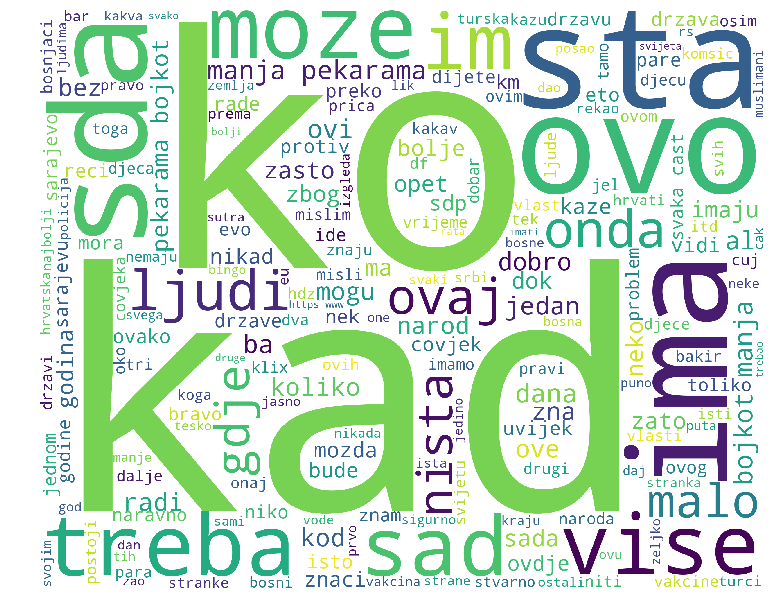

In [15]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from urllib.request import urlopen
import os


f_list = os.listdir('out/')
df = pd.DataFrame()
for f in f_list[:-1]:
    df_temp = pd.read_csv('out/{}'.format(f),delimiter='\t')
    df=df.append(df_temp)

#data = pd.read_csv("out/comments_klix.csv",delimiter="\t",encoding = "windows-1250")


#print(data.columns.values)

comments = df['comment']
#print(comments.shape)
#for c in comments:
#    print(c)

# lets clean comments
"""
claan_comments = []
for comment in comments:
    words = re.sub("[^a-zA-Z]", " ", comment)
    words = words.lower()
"""
"""
def change_letter_in_word(word,letter_1,letter_2):
    letters = list(word)
    for l in letters:
        if l==letter_1:
            l=letter_2
    new_word = ''.join(w for w in letters)
    return new_word
"""
def change_letter(letter,letter_1,letter_2):
    if letter==letter_1:
        letter=letter_2
    return letter
def wordcloud_draw(data,img_name,stopwords = None, color = 'black'):
    lower_words = []
    for row in data:
        if type(row)!=str:
            row = str(row)
        lower_words.append(re.sub("[^a-zA-Z_š_ć_ž_č_đ]", " ", row.lower()))
    lower_words_english = []
    for word in lower_words:
        word = word.replace('č', 'c')
        word = word.replace('ć', 'c')
        word = word.replace('š', 's')
        word = word.replace('ž', 'z')
        word = word.replace('đ', 'd')
        lower_words_english.append(word)
    
    #print(len(data))
    words = ' '.join(str(row) for row in lower_words_english)
    #print(words)
    cleaned_word = " ".join(word for word in words.split())
    #print(cleaned_word)
    wordcloud = WordCloud(stopwords=stopwords,
                        background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(img_name)
    plt.show()

#print(nltk.corpus.stopwords.words('langauage'))
#wordcloud_draw(comments,'klix_comments1.png','white')

hr_stopwords_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-hr/master/stopwords-hr.txt"
stopwords = urlopen(hr_stopwords_url)
stopwords_list = []
#print(len(stopwords))
for line in stopwords:
    line = re.sub("[^a-zA-Z_š_ć_ž_č_đ]", " ", line.decode("UTF-8"))
    line = line.replace('č','c')
    line = line.replace('ć','c')
    line = line.replace('š','s')
    line = line.replace('ž','z')
    line = line.replace('đ','d')
    stopwords_list.append(line.split()[0])

print(stopwords_list)
wordcloud_draw(comments,'klix_comments2.png',stopwords_list,'white')
